In [699]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [700]:
#import the file kc_house_data from downloads
df = pd.read_csv(R'C:\Users\hanna\Downloads\kc_house_data.csv')

Question 1.

In [701]:
#take a look at the first 15 rows in the data set
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [702]:
#look at data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can see here that there are no null values in the data set. However, we should convert the data type of the 'data' column from object to datetime.

In [703]:
#convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [704]:
#get more info
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Now, let's start cleaning the data so it can be used for analysis.

In [705]:
#check for duplicate rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [706]:
#check for rows that have same id number
duplicates = df[df.duplicated(subset = ['id'])]
print(len(duplicates))

177


We can see that there are no duplicate rows, but there are 177 rows with the same ID number. However, these may be attributed to the fact that homes could have been sold more than once. Therefore, I will not remove them.

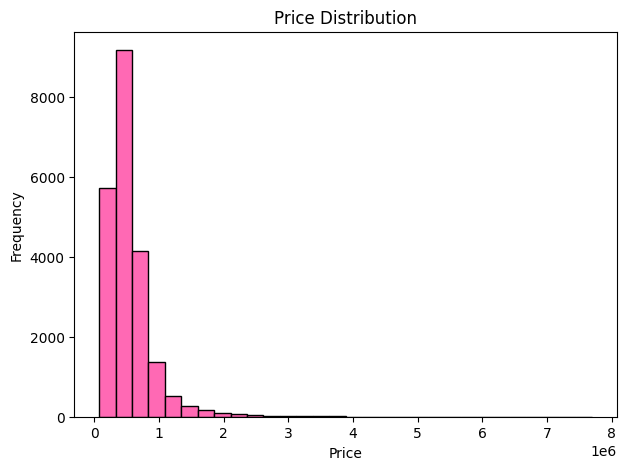

In [707]:
#create histogram for price distribution
plt.figure(figsize = (7, 5))
plt.hist(df['price'], bins = 30, color = 'hotpink', edgecolor = 'black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

In [708]:
#look at mean, median, max, min price
print('Mean Price:','$', df['price'].mean())
print('Median Price:','$',df['price'].median())
print('Max Price:','$',df['price'].max())
print('Min Price:','$',df['price'].min())

Mean Price: $ 540088.1417665294
Median Price: $ 450000.0
Max Price: $ 7700000.0
Min Price: $ 75000.0


There is a large variability in prices, however this can usually be expected when looking at housing data.

Let's check for outliers in the 'bedroom' column.

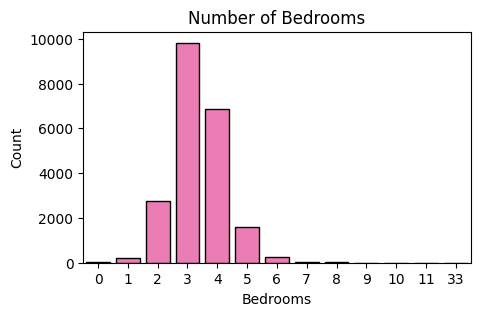

In [709]:
number_of_bedrooms = df['bedrooms'].value_counts()

# Create a bar plot of bedroom counts
plt.figure(figsize = (5, 3))
sns.barplot(x=number_of_bedrooms.index, y=number_of_bedrooms.values, color = 'hotpink', edgecolor = 'black')

# Set plot title and labels
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

# Show plot
plt.show()

It seems like there may be some outliers in the number of bedrooms, so we will investigate further.

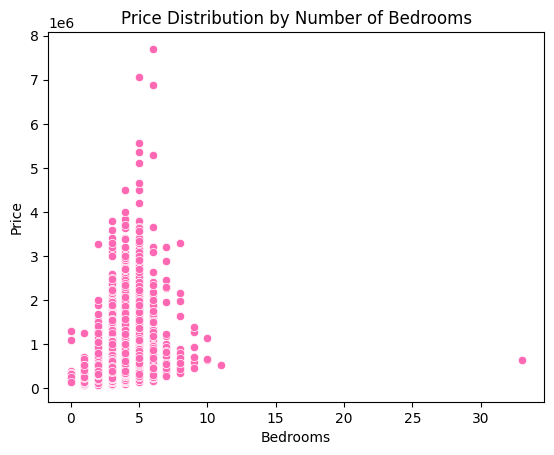

In [710]:
#create scatterplot showing price distribution by number of bedrooms
sns.scatterplot(data = df,x='bedrooms', y='price', color = 'hotpink')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bedrooms')

plt.show()

We can see that there is at least one major outlier,  but we will look at any houses that had greater or equal to 10 bedrooms.

In [711]:
#look at houses that had equal or greater to 10 bedrooms
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


We can see that id 2402100895 appears to be a data entry error. This is because the house has a low square footage and a small number of bathrooms, both of which do not typically align with having 33 bedrooms. 

In [712]:
#check median number of bedrooms for that zip code
df_copy= df[(df['zipcode'] == 98103)]
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


As we can see, the typical number of bedrooms for houses in the same area as that house is 3. As it is almost certainly a data entry error, we will drop the row.


In [713]:
#drop the outlier
df = df.drop(df[df['bedrooms'] == 33].index)

Based on the sale prices of ids 1773100755, 5566100170, and 8812401450, it appears that they may also be outliers, so they will be dropped as well.

In [714]:
#drop the rest of the outliers
drop_ids = [5566100170,8812401450,1773100755]
df = df[~df['id'].isin(drop_ids)]

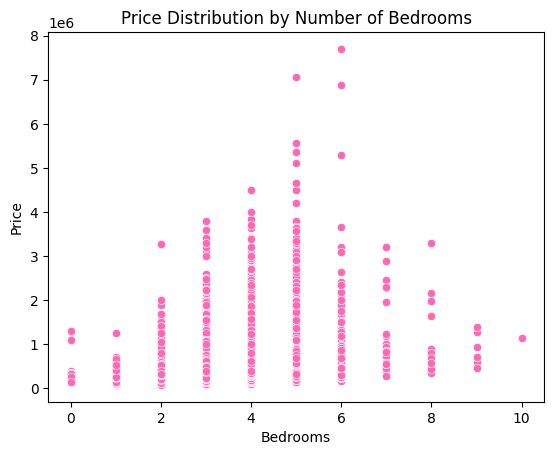

In [715]:
#check price distribution by number of bedrooms without outliers
sns.scatterplot(data = df,x = 'bedrooms', y = 'price', color = 'hotpink')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bedrooms')

plt.show()

This looks more acceptable.

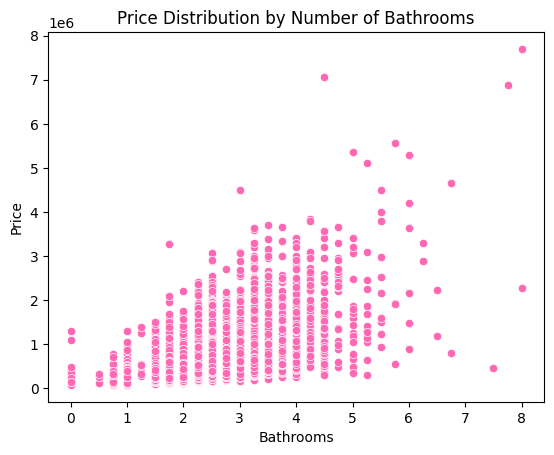

In [716]:
#create scatterplot showing price distrubution by number of bathrooms
sns.scatterplot(data = df,x = 'bathrooms', y = 'price', color = 'hotpink')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bathrooms')

# Display the plot
plt.show()

There seem to be a couple entries with a higher-than-average number of bathrooms, so we will take a look.

In [717]:
df[(df['bathrooms'] > 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


Based on the number of bedrooms vs. bathrooms in each house and the square footage, it appears that most of these are not actually data entry errors. The only one that sticks out is id 424049043, as it sold for substantially less than the others and is quite a bit smaller in terms of square footage. As it appears to be an outlier, I will drop this row. 

In [718]:
#drop the outlier
df = df.drop(df[df['id'] == 424049043].index)

In [719]:
#look at houses with 0 bathrooms
df[(df['bathrooms'] == 0)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


Some of these entires look like data entry errors. Ids 6306400140 and 2954400190 each sold for over $1M, yet have 0 bedrooms or bathrooms. I will also drop 3918400017, 3374500520, and 7849202190 as they have relatively high square footages and sales prices despite having 0 bathrooms. I will keep entries that have less than 1000 sq. feet of living space as they may have shared bathrooms (ex: trailer park).

In [720]:
#drop the rest of the outliers
ids_drop = [6306400140,2954400190,3918400017,3374500520,7849202190]
df = df[~df['id'].isin(ids_drop)]

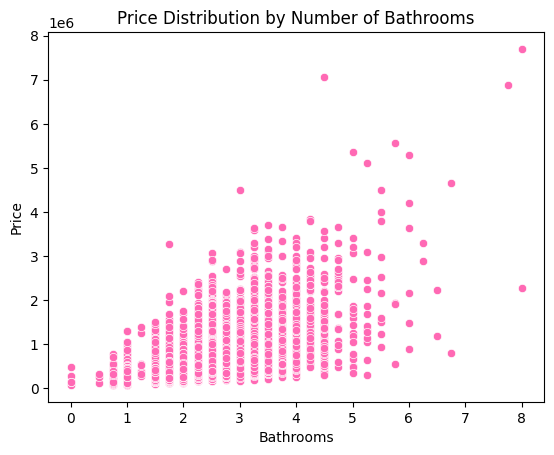

In [721]:
#check price distribution by number of bathrooms without outliers
sns.scatterplot(data = df,x = 'bathrooms', y = 'price', color = 'hotpink')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bathrooms')

plt.show()

Now, let's look at price vs. remaining variables so we can get an ideas of the distributions.

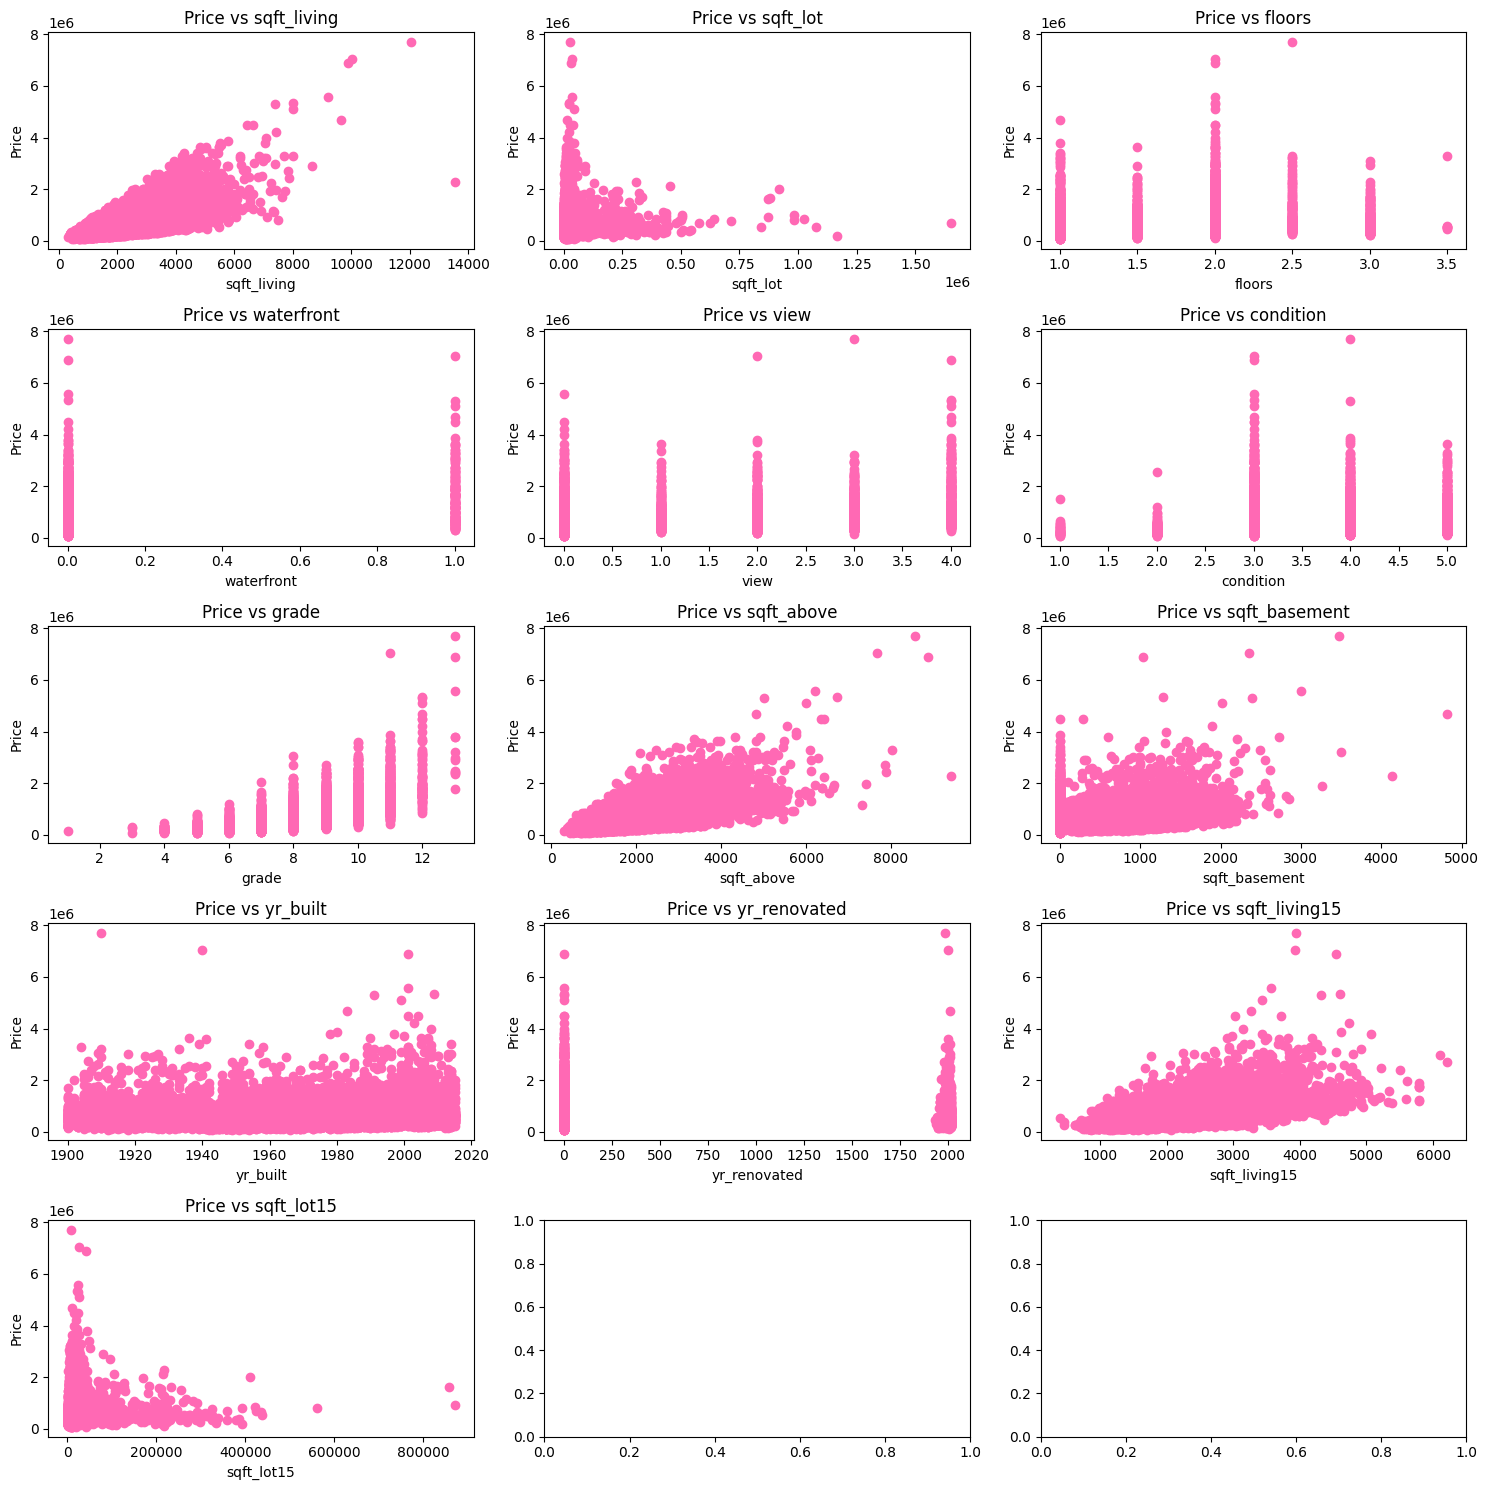

In [722]:
#create scatterplots
def scatter_plot(df, column, ax):
    ax.scatter(df[column], df['price'], color = 'hotpink')
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    scatter_plot(df, column, axs[row, col])

plt.tight_layout()

plt.show()

<Figure size 200x200 with 0 Axes>

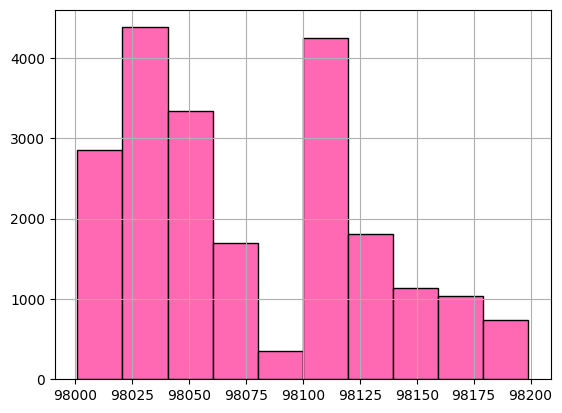

<Figure size 200x200 with 0 Axes>

In [723]:
#create a histogram by zip code
df['zipcode'].hist(color = 'hotpink', edgecolor = 'black')
plt.figure(figsize=(2,2))

<Axes: xlabel='lat', ylabel='long'>

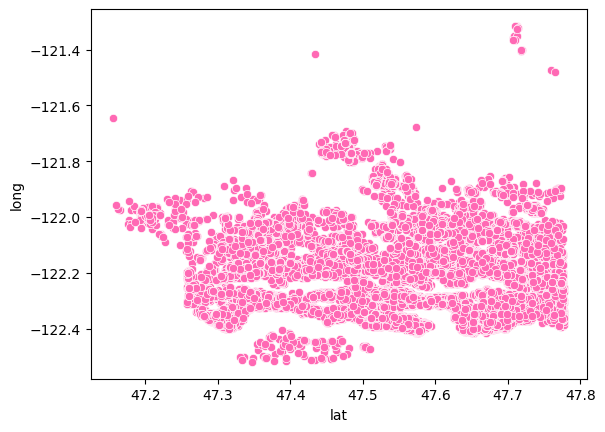

In [724]:
#create a scatterplot by latitude and longitude
sns.scatterplot(data = df, x = 'lat', y = 'long', color = 'hotpink')

Overall, the data appears to follow a fairly normal distrubution. However, we will still remove outliers from several specific columns by using the z-score method.

In [725]:
#remove outliers using z-score method
def drop_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [726]:
#apply the function to the data set df
df = drop_outliers(df)

Now, let's check how many outliers were dropped to ensure that it was not too large of a portion of the data.

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19776 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19776 non-null  int64         
 1   date           19776 non-null  datetime64[ns]
 2   price          19776 non-null  float64       
 3   bedrooms       19776 non-null  int64         
 4   bathrooms      19776 non-null  float64       
 5   sqft_living    19776 non-null  int64         
 6   sqft_lot       19776 non-null  int64         
 7   floors         19776 non-null  float64       
 8   waterfront     19776 non-null  int64         
 9   view           19776 non-null  int64         
 10  condition      19776 non-null  int64         
 11  grade          19776 non-null  int64         
 12  sqft_above     19776 non-null  int64         
 13  sqft_basement  19776 non-null  int64         
 14  yr_built       19776 non-null  int64         
 15  yr_renovated   19776 non

In [728]:
((21612-19776)/21612)*100

8.4952803997779

Only about 8.5% of the data has been dropped in total. This is acceptable. Let's look at the distributions of price vs. different variables now that the outliers have been removed.

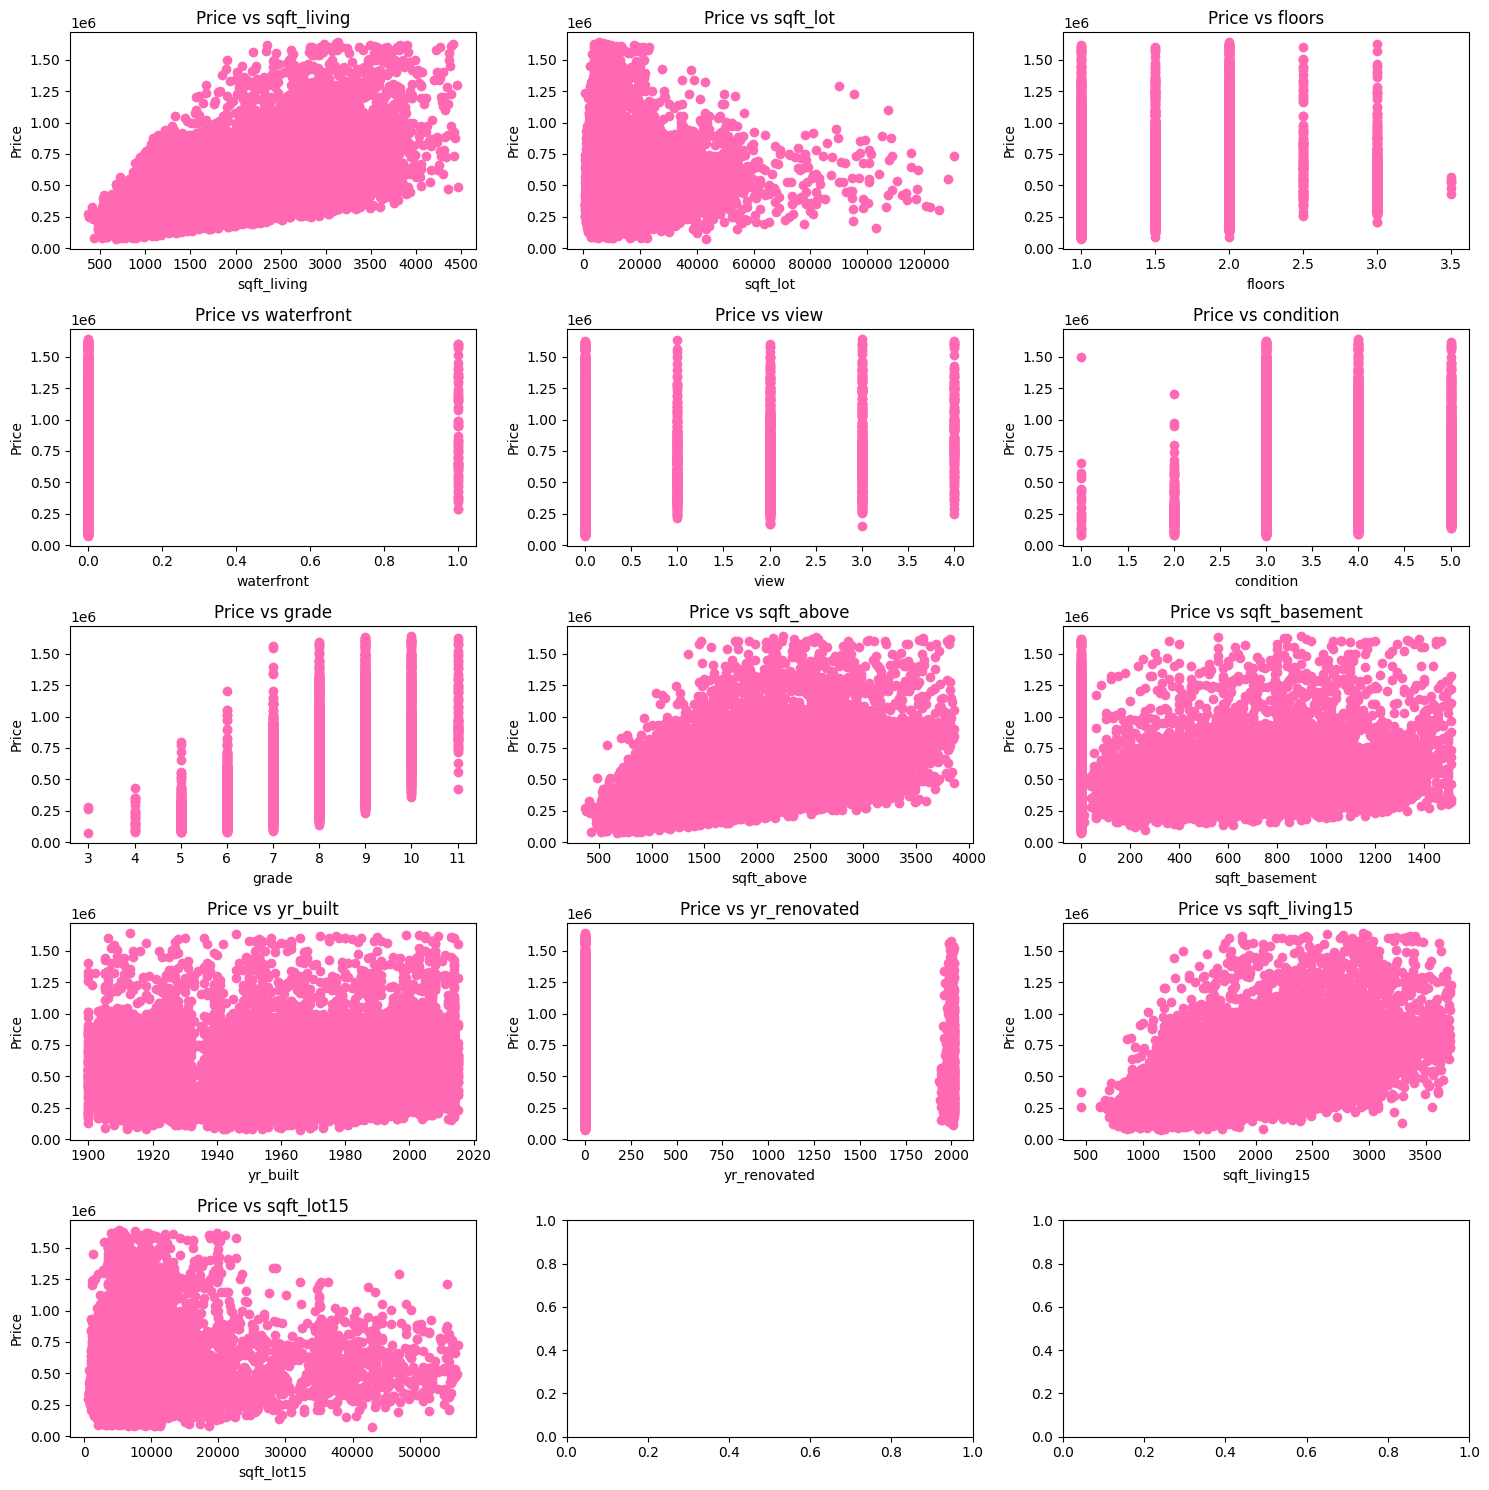

In [729]:
#create scatterplots
def scatter_plot(df, column, ax):
    ax.scatter(df[column], df['price'], color = 'hotpink')
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    scatter_plot(df, column, axs[row, col])

plt.tight_layout()

plt.show()

The distributions now seem to be more evenly distributed (normal) now that the outliers have been removed.

We will now create some new variables in order to perform our analysis.

In [730]:
#create a variable showing average price per square foot by zip code
price_per_sqft_zipcode = df.groupby('zipcode')['price'].mean() / df.groupby('zipcode')['sqft_living'].mean()
df = df.merge(price_per_sqft_zipcode.rename('price_per_sqft_zipcode'), left_on='zipcode', right_index=True)
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['house_age_when_sold'] = (df['Year'] - df['yr_built'])

In [731]:
#look at the age of houses that sold for more than $150,000
df[(df['house_age_when_sold'] < 0) &(df['price'] > 150000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_zipcode,month,Year,house_age_when_sold
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,...,0,98103,47.6725,-122.330,1800,4560,355.724166,7,2014,-1
21262,5694500840,2014-11-25,559000.0,2,3.00,1650,960,3.0,0,0,...,0,98103,47.6611,-122.346,1650,3000,355.724166,11,2014,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,...,0,98133,47.7384,-122.348,1970,18110,240.911021,8,2014,-1
21372,6169901185,2014-05-20,490000.0,5,3.50,4460,2975,3.0,0,2,...,0,98119,47.6313,-122.370,2490,4231,408.874105,5,2014,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,...,0,98122,47.6074,-122.305,1480,3600,350.708059,6,2014,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,...,0,98122,47.6047,-122.305,1380,1495,350.708059,8,2014,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,...,0,98144,47.5756,-122.316,1440,4800,297.775429,10,2014,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,...,0,98144,47.6001,-122.298,1320,1852,297.775429,6,2014,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,...,0,98144,47.5951,-122.301,1350,3000,297.775429,7,2014,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,...,0,98199,47.6514,-122.385,1570,6000,356.489415,8,2014,-1


It appears that many higher-priced houses were sold before they were built, however this is not out of the ordinary as pre-construction houses often sell for high prices.

In [732]:
#create a variable that puts houses in categories by grade
def house_grade_cat(x):
    if x <= 3:
        return 1
    elif x >= 4 and x <=6:
        return 2
    elif x >= 7 and x < 10:
        return 3
    elif x >= 10:
        return 4
    else:
        return 'Missing'

In [733]:
#apply function
df['grade_category'] = df['grade'].apply(house_grade_cat)

In [734]:
#create a variable that puts houses in category by number of floors
def number_floors_cat(x):
    if x >= 0 and x < 2:
        return 1
    elif x >= 2 and x < 3:
        return 2
    elif x >= 3 and x < 4:
        return 3
    else:
        return 'Missing'

In [735]:
#apply function
df['floor_category'] = df['floors'].apply(number_floors_cat)

Summary of new variables created:
- price_per_sqft_zipcode: This is the average price per square foot of houses in each zip code.
- month: This is the month of sale.
- year: This is the year of sale.
- house_age_when_sold: This is the age of the house (in years) at the time of sale.
- house_grade_cat: These are bins created for different levels in house grades.
- number_floors_cat: These are bins created for different groups of the number of floors in houses sold.

In [736]:
#look at data set info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19776 entries, 0 to 18892
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      19776 non-null  int64         
 1   date                    19776 non-null  datetime64[ns]
 2   price                   19776 non-null  float64       
 3   bedrooms                19776 non-null  int64         
 4   bathrooms               19776 non-null  float64       
 5   sqft_living             19776 non-null  int64         
 6   sqft_lot                19776 non-null  int64         
 7   floors                  19776 non-null  float64       
 8   waterfront              19776 non-null  int64         
 9   view                    19776 non-null  int64         
 10  condition               19776 non-null  int64         
 11  grade                   19776 non-null  int64         
 12  sqft_above              19776 non-null  int64      

I can now drop the id and date columns as they are no longer necessary for analysis.

In [737]:
#drop id and date columns
df.drop(columns=['date','id'], inplace=True)

We can now run an OLS regression.

In [738]:
#run OLS regression
results = ols("price ~ bedrooms + bathrooms + condition + sqft_living + floors + waterfront + view + grade + sqft_above + sqft_basement + yr_renovated + zipcode + lat + sqft_living15 + sqft_lot15 + Year + house_age_when_sold + grade_category + price_per_sqft_zipcode +floor_category", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     4753.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:33:38   Log-Likelihood:            -2.5591e+05
No. Observations:               19776   AIC:                         5.119e+05
Df Residuals:                   19756   BIC:                         5.120e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.85

In [739]:
#using this combination of variables
ols_pred_vals = results.predict(df[['bedrooms','bathrooms', 'condition', 'sqft_living','floors','waterfront','view','grade','sqft_above', 'sqft_basement' ,'yr_renovated','zipcode','lat' , 'sqft_living15', 'sqft_lot15' , 'Year','house_age_when_sold','grade_category','price_per_sqft_zipcode','floor_category']])

In [740]:
#see what the RMSE is right now
df_copy=df.copy()
res = pd.concat([ols_pred_vals.to_frame().rename(columns={0:'y_hat'}),df_copy['price']], axis=1)
res['error'] = res['y_hat'] - res['price']
res['sq_error'] = res['error']**2
np.sqrt(res['sq_error'].mean())

100874.66233844441

As discussed in class, the RMSE should be around or below 100,000, so we will see if we can improve the model.

In [741]:
#use the following variables in the models
categorical_features = ['floors','waterfront', 'view','condition', 'grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_per_sqft_zipcode','month','Year','house_age_when_sold']
target = 'price'

In [742]:
#now we split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [743]:
#perform linear regression
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_regression.fit(x_train, y_train)
predict_linreg = linear_regression.predict(x_test)
rmse_linear = np.sqrt(mean_squared_error(predict_linreg,y_test))
r2_linear = r2_score(y_test, predict_linreg)

print("RMSE (Linear Regression):", rmse_linear)
print("R-squared (Linear Regression):", r2_linear)

RMSE (Linear Regression): 96631.46750240383
R-squared (Linear Regression): 0.8299924459795972


After performing linear regression, the RMSE value returned is about 96631. This is an improvement from before and indicates that the model is performing fairly well. The r-squared value is 82.99%, meaning that about 82.99% of the variability in price can be explained by the independent variables in this model.

A Q-Q plot compares the distribution of observed data to an expected distribution (such as normal distribution). It plots the quantiles of the observed data against the quantiles of the expected distribution. If the points on the plot roughly form a straight line, it suggests that the observed data follows the expected distribution. If the points deviate from a straight line, it indicates differences between the observed and expected distributions. Therefore, I will create Q-Q plotsfor each regression model to help to assess the similarity between observed and expected distributions and identify departures from the expected distribution. 

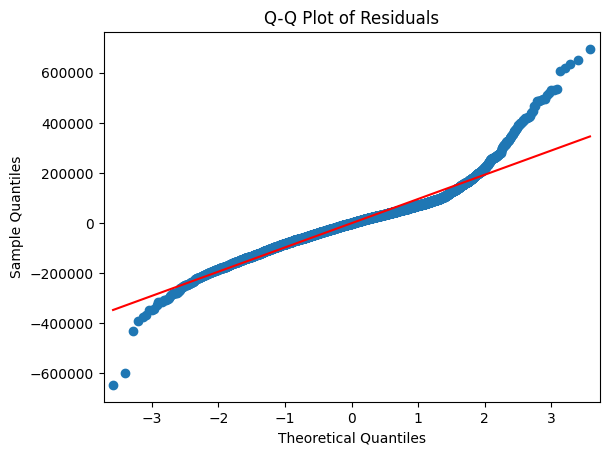

In [744]:
#create Q-Q plot for linear
residuals_linear = y_test - predict_linreg
sm.qqplot(residuals_linear, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [745]:
#try ridge regression
ridge_regression = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=4))
    ])
ridge_regression.fit(x_train, y_train)
predict_ridge = ridge_regression.predict(x_test)
rmse_ridge = np.sqrt(mean_squared_error(predict_ridge, y_test))
r2_ridge = r2_score(y_test, predict_ridge)

print("RMSE (Ridge Regression):", rmse_ridge)
print("R-squared (Ridge Regression):", r2_ridge)

RMSE (Ridge Regression): 96411.58709887826
R-squared (Ridge Regression): 0.8307652542750377


After trying several alpha values, it was determined that an alpha value of 4 yielded the lowest RMSE (96411). The r-squared value is about 83.07%, meaning that about 83.07% of the variability in price can be explained by the independent variables in this model.

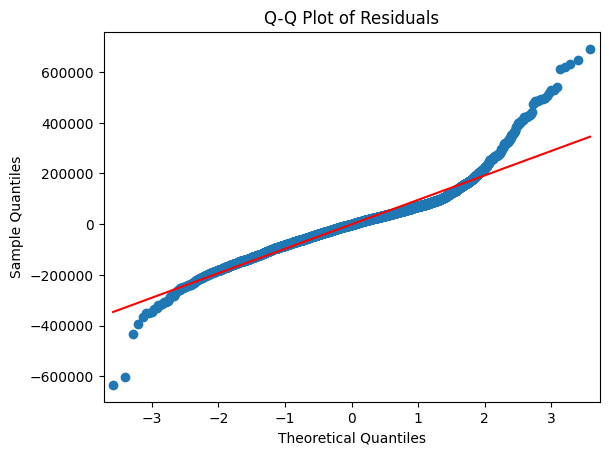

In [746]:
#create Q-Q plot for ridge
residuals_ridge = y_test - predict_ridge
sm.qqplot(residuals_ridge, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [747]:
#try lasso regression
lasso_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.2))
])
lasso_regression.fit(x_train, y_train)
predict_lasso = lasso_regression.predict(x_test)
rmse_lasso = np.sqrt(mean_squared_error(predict_lasso, y_test))
r2_lasso = r2_score(y_test, predict_lasso)

print("RMSE (Lasso Regression):", rmse_lasso)
print("R-squared (Lasso Regression):", r2_lasso)


RMSE (Lasso Regression): 96502.1572817506
R-squared (Lasso Regression): 0.8304471426910559


C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.375e+13, tolerance: 7.953e+10
  model = cd_fast.enet_coordinate_descent(


After trying several alpha values, it was determined that an alpha value of 1.2 yielded the lowest RMSE (96502). This is slightly higher than ridge regression, so it is not an improvement. The r-squared value is about 83.04%, meaning that about 83.04% of the variability in price can be explained by the independent variables in this model.

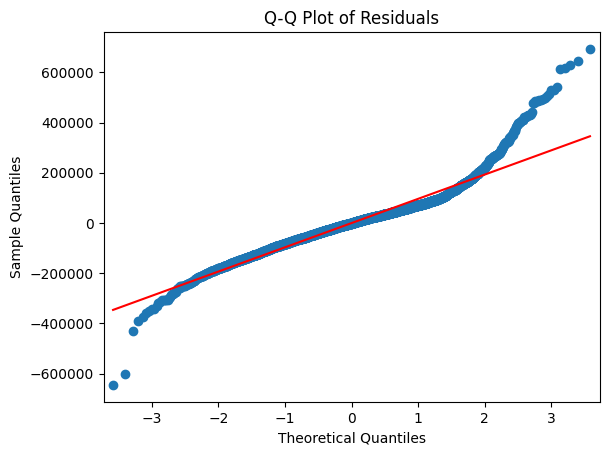

In [748]:
#create Q-Q plot for lasso
residuals_lasso = y_test - predict_lasso
sm.qqplot(residuals_lasso, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [749]:
#try elastic net regression
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.5, l1_ratio=0.8))
])
elasticnet_regression.fit(x_train, y_train)
predict_en = elasticnet_regression.predict(x_test)
rmse_elasticnet = np.sqrt(mean_squared_error(predict_en, y_test))
r2_elasticnet = r2_score(y_test, predict_en)

print("RMSE (Elastic Net Regression):", rmse_elasticnet)
print("R-squared (Elastic Net Regression):", r2_elasticnet)

RMSE (Elastic Net Regression): 102931.34277010431
R-squared (Elastic Net Regression): 0.8071026126240887


The alpha value of 0.5 gave the lowest RMSE value (102931), however all values returned were higher than those of ridge regression or lasso regression. This means that this model did not introduce any improvements. The r-squared value is about 80.71%, meaning that about 80.71% of the variability in price can be explained by the independent variables in this model.

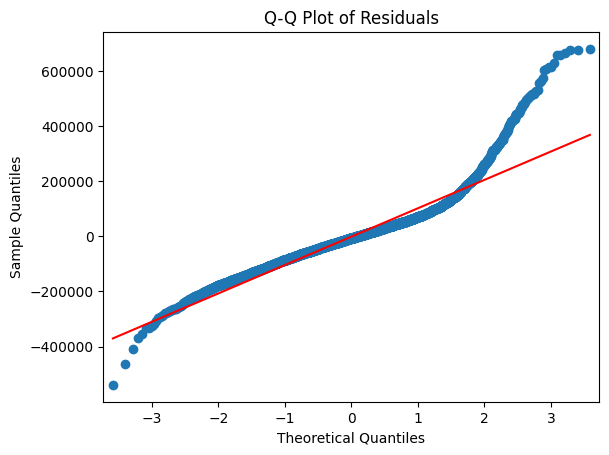

In [750]:
#create Q-Q plot for elastic net
residuals_en = y_test - predict_en
sm.qqplot(residuals_en, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

Question 2.

RMSE values of each model: 
- Linear Regression: 96631.46750240383
- Ridge Regression: 96411.58709887826
- Lasso Regression: 96502.1572817506
- Elastic Net Regression: 102931.34277010431

R-squared values of each model:
- Linear Regression: 0.8299924459795972
- Ridge Regression: 0.8307652542750377
- Lasso Regression: 0.8304471426910559
- Elastic Net Regression: 0.8071026126240887

To evaluate the models and determine the best one, let's analyze the results:

1. RMSE values: The Root Mean Squared Error (RMSE) measures the average deviation between the predicted values and the actual values. Lower RMSE values indicate better predictive performance. In this case, all models have similar RMSE values ranging from approximately 96000 to 103000. However, the Ridge Regression model has the lowest RMSE of 96411.587, indicating it has the smallest average deviation from the actual values among the models tested.

2. R-squared values: The R-squared value represents the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating better goodness of fit. In this case, all models have R-squared values around 0.83, which suggests that approximately 83% of the variance in the target variable can be explained by the models. The Linear Regression, Ridge Regression, and Lasso Regression models have similar R-squared values, while the Elastic Net Regression model has a slightly lower R-squared value of 0.807.

3. Q-Q Plot: The Q-Q plots of all regression models were relatively similar and positively skewed, so this does not have a large bearing on determining which model performs best.

Given the results and considering the tools used in class, which include Linear Regression, Ridge Regression, Lasso Regression, and Elastic Net Regression, the best model among the ones tested appears to be the Ridge Regression model. It has the lowest RMSE and a high R-squared value, indicating better predictive performance and a better fit to the data compared to the other models. However, it's important to consider other factors such as the interpretability of the model and computational efficiency.


Question 3.

According to the results of the analysis, the main drivers of house prices in King City are:
- Waterfront: Having a waterfront view is estimated to increase house prices by about $250,900. This suggests that individuals are willing to pay more for waterfront properties. The unique combination of scenic beauty, recreational opportunities, exclusivity, potential investment value, and enhanced lifestyle makes waterfront properties highly sought after and justifies their premium prices in the real estate market.
- View: Each increase in the view rating is estimated to increase house prices by about $40,220. This suggests that individuals are willing to pay more for properties with a nicer view. The subjective value placed on the aesthetic appeal, emotional well-being, privacy, investment potential, and overall lifestyle benefits associated with a beautiful view make it a sought-after feature in real estate.
- Grade: Each increase in grade rating is estimated to increase house prices by about $55,830. This suggests people's willingness to pay more for higher grade properties. The superior quality, enhanced comfort, prestige, resale value, amenities, design, and limited availability contribute to the perceived value and desirability of higher grade properties in the real estate market.
- Condition: Each increase in condition rating is estimated to increase house prices by about $26,300. This suggests people's willingness to pay more for properties in better condition. The overall benefits, including reduced maintenance costs, move-in ready convenience, time savings, improved quality of living, durability, perceived value, and resale potential that are associated with properties in better condition justify the higher price for many buyers in the real estate market.

Of course, there are other variables that impact house prices. For example, each increase in the sale year is estimated to increase house prices by $23,090 and each additional bathroom is estimated to increase house prices by $18,950. Looking at many different variables and using a combination of them allows for the most accurate predictions of house prices.